In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from collections import Counter

plt.style.use('default')


ModuleNotFoundError: No module named 'matplotlib'

# Õppeandmete Analüüs - ARKI.02.030 "Lastekirurgia"

See notebook sisaldab detailset analüüsi ainekoodiga **ARKI.02.030** (Paediatric Surgery / Lastekirurgia).

## Analüüsi osad:
1. Andmete laadimine ja üldine ülevaade
2. ARKI.02.030 põhiandmete analüüs
3. Andmekvaliteedi analüüs (tühjad väljad, JSON struktuurid)
4. Õppetöö mahtude jaotus ja visualiseering
5. Õppejõud ja organisatsioon
6. Seotus teiste ainetega


In [ ]:
# Lae andmed CSV-st
df = pd.read_csv('toorandmed.csv')

print(f"Andmestiku suurus: {df.shape}")
print(f"Kokku tunnuseid (veerge): {df.shape[1]}")
print(f"Kokku ridu (ained): {df.shape[0]}")
print(f"\nAndmestiku üldine täitematus:")
null_count = df.isnull().sum().sum()
total = df.shape[0] * df.shape[1]
print(f"Tühjad lahtrid: {null_count} / {total}")
print(f"Tühjus %: {(null_count / total * 100):.1f}%")


Andmestiku suurus: (3031, 223)
Kokku tunnuseid (veerge): 223
Kokku ridu (ained): 3031

Andmestiku üldine täitematus:
Tühjad lahtrid: 277368 / 675913
Tühjus %: 41.0%


In [ ]:
# Filtreeri ja lae ARKI.02.030 aine
aine = df[df['code'] == 'ARKI.02.030'].iloc[0]

print("=" * 80)
print("ARKI.02.030 - PAEDIATRIC SURGERY / LASTEKIRURGIA")
print("=" * 80)

print(f"\n1. PÕHIANDMED:")
print(f"   Ainekood: {aine['code']}")
print(f"   Nimetus (EN): {aine['title__en']}")
print(f"   Nimetus (ET): {aine['title__et']}")
print(f"   Krediidid (EAP): {aine['credits']}")
print(f"   UUID: {aine['course_uuid']}")
print(f"   Olek: {aine['state__en']}")

print(f"\n2. STRUKTUURIÜKSUS:")
try:
    struct_str = aine['general__structural_units']
    if pd.notna(struct_str) and struct_str != '':
        struct_info = json.loads(struct_str)
        for unit in struct_info:
            print(f"   Kood: {unit.get('structural_unit_code', 'N/A')}")
            print(f"   Nimi (EN): {unit.get('structural_unit_name', {}).get('en', 'N/A')}")
            print(f"   Nimi (ET): {unit.get('structural_unit_name', {}).get('et', 'N/A')}")
            print(f"   Koordineeriv: {unit.get('coordinating', 'N/A')}")
            print(f"   Kursuse osakaal: {unit.get('course_share_percent', 'N/A')}%")
except Exception as e:
    print(f"   Struktuuriandmete laadimine ei õnnestunud: {e}")

print(f"\n3. ÕPPEKEELED:")
try:
    lang_str = aine['general__input_languages']
    if pd.notna(lang_str) and lang_str != '':
        languages = json.loads(lang_str)
        for lang in languages:
            code = lang.get('code', 'N/A')
            name_en = lang.get('en', 'N/A')
            name_et = lang.get('et', 'N/A')
            print(f"   {code}: {name_en} / {name_et}")
except Exception as e:
    print(f"   Keelesadmete laadimine ei õnnestunud: {e}")


ARKI.02.030 - PAEDIATRIC SURGERY / LASTEKIRURGIA

1. PÕHIANDMED:
   Ainekood: ARKI.02.030
   Nimetus (EN): Paediatric Surgery
   Nimetus (ET): Lastekirurgia
   Krediidid (EAP): 2.25
   UUID: c4890754-9e2b-7461-1ab6-17fac20cd1e8
   Olek: confirmed

2. STRUKTUURIÜKSUS:
   Kood: N/A
   Nimi (EN): N/A
   Nimi (ET): N/A
   Koordineeriv: N/A
   Kursuse osakaal: N/A%

3. ÕPPEKEELED:
   et: Estonian / eesti keel


In [ ]:
print("=" * 80)
print("ANDMEKVALITEEDI ANALÜÜS - ARKI.02.030")
print("=" * 80)

# Analüüsi kõik veergud
veergud = df.columns.tolist()
print(f"\nKokku veerge: {len(veergud)}")

# Kontrollime ARKI.02.030 rea tühjuust
null_veerud = []
json_veerud = []
uuid_veerud = []

for col in veergud:
    val = aine[col]
    
    # Kontrolli tühjust
    if pd.isna(val) or val == '' or val == 'None':
        null_veerud.append(col)
    
    # Kontrolli JSON struktuuri
    if isinstance(val, str):
        if val.startswith('[{') or val.startswith('[') or val.startswith('{'):
            if val.startswith('[') or val.startswith('{'):
                json_veerud.append(col)
        # UUID pattern
        if len(val) == 36 and val.count('-') == 4:
            uuid_veerud.append(col)

print(f"\n1. TÜHJAD VÄLJAD: {len(null_veerud)} / {len(veergud)} ({len(null_veerud)/len(veergud)*100:.1f}%)")
if null_veerud:
    print("   Tühjad väljad:")
    for i, col in enumerate(null_veerud[:15], 1):
        print(f"   {i}. {col}")
    if len(null_veerud) > 15:
        print(f"   ... ja {len(null_veerud) - 15} veel")

print(f"\n2. JSON-VORMINGUS VÄLJAD: {len(json_veerud)}")
if json_veerud:
    print("   JSON väljad (näiteid):")
    for col in json_veerud[:8]:
        print(f"   - {col}")
    if len(json_veerud) > 8:
        print(f"   ... ja {len(json_veerud) - 8} veel")

print(f"\n3. UUID-IDENTIFIKAATORID: {len(uuid_veerud)}")
if uuid_veerud:
    print("   UUIDs:")
    for col in uuid_veerud[:5]:
        val = aine[col]
        col_short = col if len(col) < 40 else col[:40] + '...'
        print(f"   - {col_short}: {val}")
    if len(uuid_veerud) > 5:
        print(f"   ... ja {len(uuid_veerud) - 5} veel")


ANDMEKVALITEEDI ANALÜÜS - ARKI.02.030

Kokku veerge: 223

1. TÜHJAD VÄLJAD: 91 / 223 (40.8%)
   Tühjad väljad:
   1. version__target__part__en
   2. version__target__part_credits
   3. version__resources__learning_environments
   4. version__registration_info__max_students
   5. additional_info__occurrence_frequency__code
   6. additional_info__occurrence_frequency__et
   7. additional_info__occurrence_frequency__en
   8. version__grading__independent_work__et
   9. version__target__course_main_structural_unit__email
   10. version__resources__materials
   11. version__overview__notes__et
   12. version__registration_info__audience__et
   13. version__confirmation_process__confirmation_uuid
   14. version__confirmation_process__state_code
   15. version__confirmation_process__is_paused
   ... ja 76 veel

2. JSON-VORMINGUS VÄLJAD: 16
   JSON väljad (näiteid):
   - general__input_languages
   - general__structural_unit_shares
   - general__structural_units
   - additional_info__prerequis

ÕPPETÖÖ MAHTUDE ANALÜÜS

Õppetöö mahtu sisaldavad väljad:
  version__additional_info__hours__lecture: 10.0 h
  version__additional_info__hours__practice: 15.0 h
  version__additional_info__hours__independent_work: 33.5 h


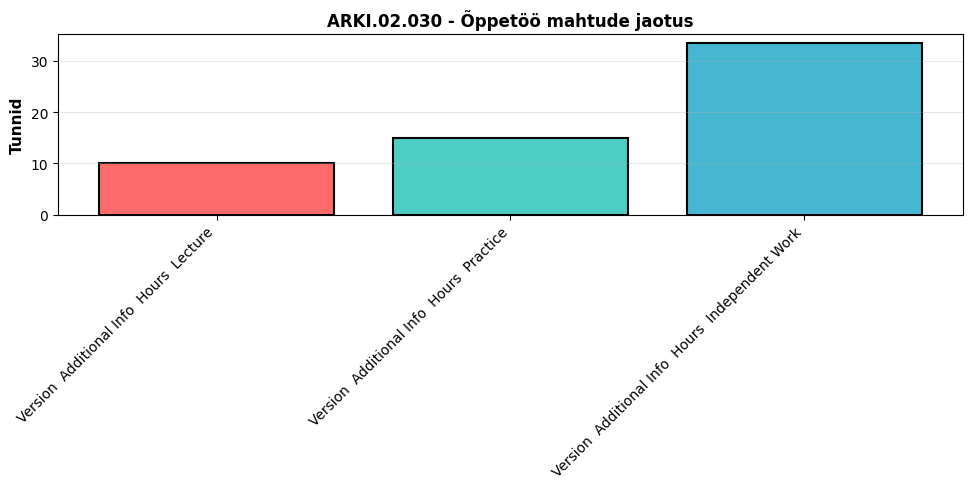


Õppetöö kogumaht: 58.5 tundi
EAP krediidid: 2.25
Tundide/EAP suhe: 26.0 tundi per EAP


In [ ]:
print("=" * 80)
print("ÕPPETÖÖ MAHTUDE ANALÜÜS")
print("=" * 80)

# Otsime õppetöö tunnuseid
work_cols = [col for col in veergud if 'workload' in col.lower() or 'hours' in col.lower() or 'hour' in col.lower()]

print(f"\nÕppetöö mahtu sisaldavad väljad:")
work_data = {}
for col in work_cols[:15]:
    try:
        val = float(aine[col]) if pd.notna(aine[col]) else 0
        if val > 0:
            print(f"  {col}: {val} h")
            work_data[col] = val
    except:
        pass

if work_data:
    # Visualiseering
    fig, ax = plt.subplots(figsize=(10, 5))
    labels = [col.replace('version__workload__', '').replace('_', ' ').title() for col in work_data.keys()]
    values = list(work_data.values())
    
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
    ax.bar(range(len(values)), values, color=colors[:len(values)], edgecolor='black', linewidth=1.5)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=45, ha='right')
    ax.set_ylabel('Tunnid', fontsize=11, fontweight='bold')
    ax.set_title('ARKI.02.030 - Õppetöö mahtude jaotus', fontsize=12, fontweight='bold')
    ax.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    total_hours = sum(values)
    credits = aine['credits']
    print(f"\nÕppetöö kogumaht: {total_hours} tundi")
    print(f"EAP krediidid: {credits}")
    if credits > 0:
        print(f"Tundide/EAP suhe: {total_hours / credits:.1f} tundi per EAP")
else:
    print("\nÕppetöö mahtu sisaldavaid välju ei leitud.")


In [ ]:
print("=" * 80)
print("SEOTUS TEISTE AINETEGA")
print("=" * 80)

# Otsime, kas ARKI.02.030 on osa teistest ainetest
print(f"\nLeiame ained, milles ARKI.02.030 on osa...")

complex_courses = []
for idx, row in df.iterrows():
    try:
        subsets = row.get('additional_info__complex_course_sub_courses', '')
        if pd.notna(subsets) and subsets != '' and 'ARKI.02.030' in str(subsets):
            complex_courses.append({
                'code': row['code'],
                'title_en': row['title__en'],
                'title_et': row['title__et'],
                'credits': row['credits']
            })
    except:
        pass

if complex_courses:
    print(f"\nARKI.02.030 sisaldub järgmistes kompleksaintes:")
    for course in complex_courses:
        print(f"  - {course['code']}: {course['title_en']} ({course['credits']} EAP)")
        print(f"    Eesti keeles: {course['title_et']}")
else:
    print("\nSeotud kompleksainet ei leitud.")

# Näita üldist info
print(f"\nÜldine info ARKI.02.030 kohta:")
if pd.notna(aine['overview__description__en']):
    desc = str(aine['overview__description__en'])[:200]
    print(f"Kirjeldus (EN): {desc}...")


SEOTUS TEISTE AINETEGA

Leiame ained, milles ARKI.02.030 on osa...

ARKI.02.030 sisaldub järgmistes kompleksaintes:
  - AR00.00.066: Surgery (12.0 EAP)
    Eesti keeles: Kirurgia

Üldine info ARKI.02.030 kohta:
Kirjeldus (EN): Diagnostic and treatment principles, methods and tactics of surgical diseases in children. The course is a part of the subject "Surgery" (12 CP)....
